In [ ]:
import pandas as pd 

from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
#Read files
datafile = r'/gdrive/My Drive/Data Projects/Marketing Analytics/Lesson 5/location_rev.csv'
df = pd.read_csv(datafile) #creates a dataframe
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


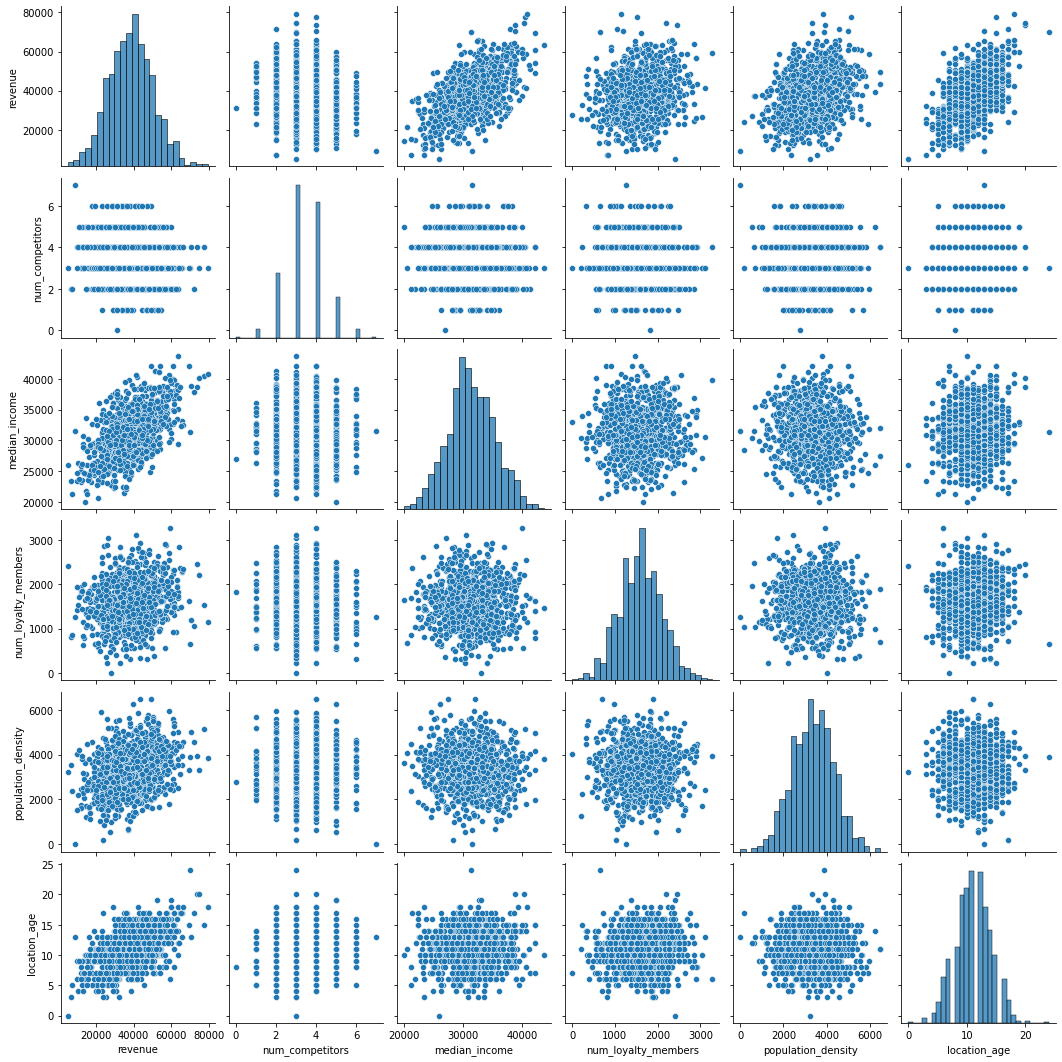

In [24]:
import seaborn as sns
sns.pairplot(df)

Correlation Analysis

In [ ]:
df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


Correlation Observations: 


*  The highest correlating factors for revenue are median income and location age
*   As revenue increases, so does median income and location age



Create variable X and y for prediction and outcome (revenue)

In [ ]:
#store predictors as x and outcome as y

X = df[['num_competitors', 
        'median_income', 
        'num_loyalty_members',
        'population_density',
        'location_age'
       ]]
y = df['revenue']

Split data into a training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

Create a Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#examine model coefficients
model.coef_

array([-2.14765128e+03,  1.71903196e+00,  3.50665069e+00,  4.31777912e+00,
        2.06703103e+03])

In [ ]:
#check the intercept term of the model
model.intercept_

-51068.63644236364

Produce a prediction for a location that has: 

* 3 competitors
* median income of $30,000
* 1,200 loyalty members
* a population density of 2,000
* a location age of 10

In [ ]:
single_customer = pd.DataFrame({
    'num_competitors' : [3],
    'median_income': [30000],
    'num_loyalty_members': [1200],
    'population_density': [2000],
    'location_age': [10]
})

model.predict(single_customer)

array([27573.21782447])

*Predicted revenue of a customer with this data profile: $27,573.22*

In [ ]:
X.mean()

num_competitors            3.3970
median_income          31360.6685
num_loyalty_members     1597.2000
population_density      3351.1990
location_age              11.0410
dtype: float64

Plot the model's predictions versus the true values on the test data

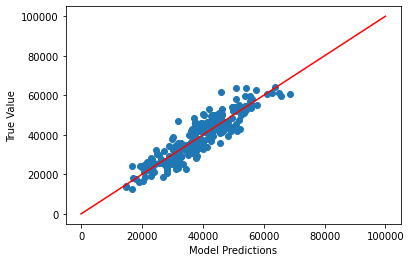

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], 'k-', color = 'r')

plt.show()

*The model predictions plotted against the true values. The model does a good job.*

Calculate the correlation between the model predictions and the true test data

In [ ]:
from scipy.stats.stats import pearsonr
pearsonr(model.predict(X_test), y_test)

(0.9061597827907564, 1.1552714895195607e-94)

There is a very high correlation, suggesting a very strong relationship 